In [1]:
import random
import timeit
import numpy as np
from functools import partial
from typing import List
import matplotlib.pyplot as plt

# Algorithms & Data Structures Lab 1

## **Part 0: How to correctly plot algorithm execution time graphs?**

One of the most important parts of this laboratory work, besides writing the algorithm, is its correct analysis. One way to analyze an algorithm is to plot the execution time for different input data. With the help of such graphs, we can practically prove that the algorithm works in $O(n)$, $O(n\log n)$, $O(n^2)$, etc. However, improper scaling can lead to incorrect results.

Suppose we have an algorithm that operates in $O(n^2)$ time. The graph of the time complexity as a function of the input size should resemble the parabola $y = x^2$. A suitable approach for graphing this would be to select values of n in an arithmetic progression. For instance, we could take n from 100 to 5000 in increments of 100.

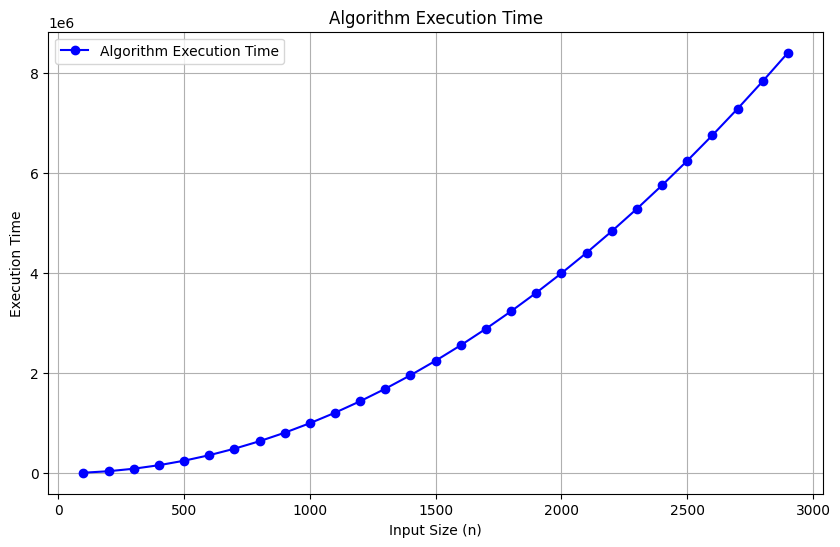

This graph clearly illustrates the branch of the parabola, confirming that the algorithm indeed operates in $O(n^2)$. Now, let's consider a less favorable option: scaling the x-axis exponentially (e.g., $n = 2, 4, 8, 16, ...$).

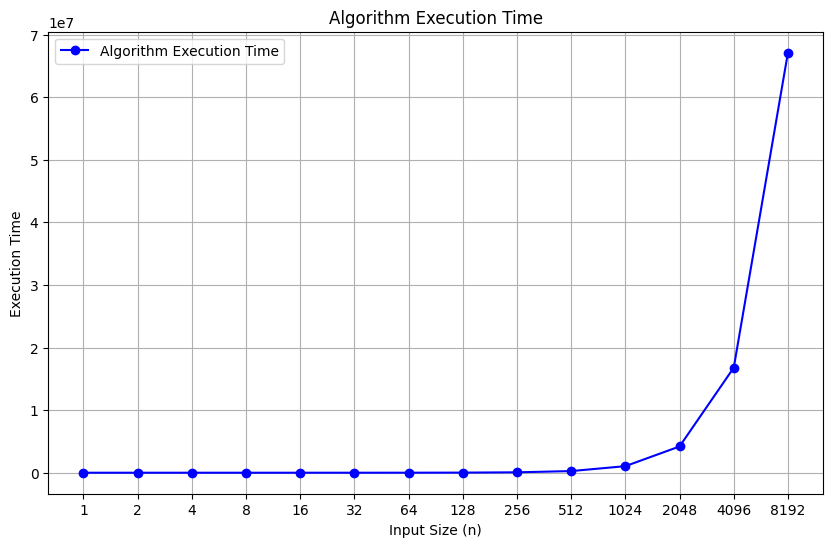

Due to the incorrect scaling of the x-axis, it is impossible to determine whether the algorithm truly operates in $O(n^2)$. Therefore, this example underscores the importance of accurately constructing graphs. In fact, $n$ can also be an exponential sequence, but this is only valid if we plot the x-axis correctly.

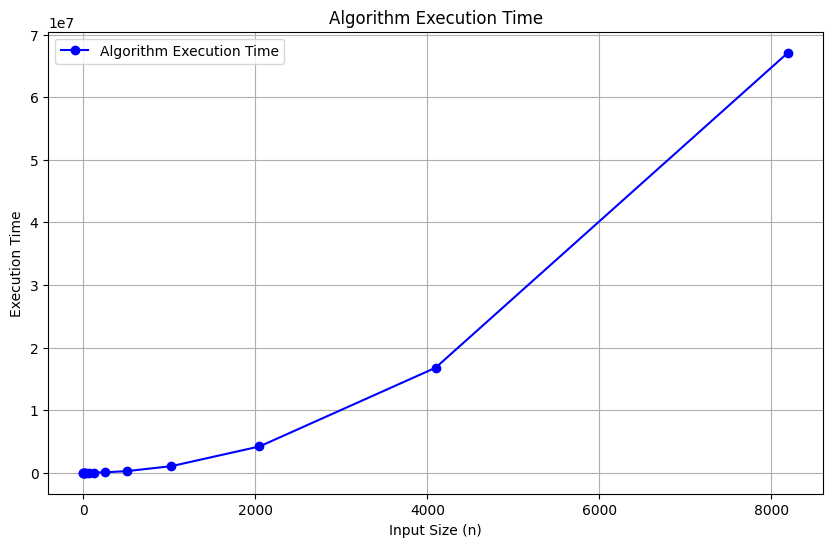

This graph looks much better now. However, when performing this task, and generally when analyzing any algorithm, it is recommended to use arithmetic progressions to scale the input data size.



## **Part 1: Fast multiplication** (1 pt)

### **1.1: Matrix multiplication**

Now since we’re done with multiplication of simple numbers let’s consider a bit more
complicated case. Remind how [one multiplies matrices](https://en.wikipedia.org/wiki/Matrix_multiplication_algorithm#Iterative_algorithm): in product C = A * B the dot product of
**i’th** row of matrix A and j’th column of matrix B composes the **ij’th** element of matrix C. If both A
and B are square matrices with size $n \times n$ hen calculating each dot product costs time $O(n)$. Finally, dot product is calculated $n^2$ times (for each row-column pair) so the resulting time complexity is $O(n^3)$. This is a trivial algorithm that mimics the definition of matrix multiplication.

$$
\begin{bmatrix} 
a & b \\ 
c & d \\ 
\end{bmatrix} 

\times

\begin{bmatrix} 
e & f \\ 
g & h \\ 
\end{bmatrix} 

=

\begin{bmatrix} 
a * e + b * g & a * f + b * h\\ 
c * e + d * g & c * f + d * h \\ 
\end{bmatrix} 
$$

**1. Implement trivial matrix multiplication algorithm (0.1 pts)**

In [2]:
def matrix_trivial_multiplication(matrix1: np.ndarray, matrix2: np.ndarray) -> np.ndarray:
    ...

In [3]:
print(matrix_trivial_multiplication(np.array([[1,2,3],[4,5,6]]), np.array([[7,8],[9,10],[11,12]]))) #[[58, 64], [139, 154]]

None


As you have already suspected, this is not an optimal solution. In 1969 Volker Strassen
proposed to reuse ideas of Karatsuba for matrix multiplication. [Strassen’s algorithm](https://en.wikipedia.org/wiki/Strassen_algorithm) reuse the trick of reducing number of smaller subproblems to achieve subcubic complexity of $O(n^{\log_2 7})$

$$
\begin{bmatrix} 
a & b \\ 
c & d \\ 
\end{bmatrix} 

\times

\begin{bmatrix} 
e & f \\ 
g & h \\ 
\end{bmatrix} 
$$

$$
    P_1 = a * (f - h) \quad
    P_2 = (a + b) * h
$$
$$
    P_3 = (c + d) * e \quad
    P_4 =  d * (g - e)
$$
$$
    P_5 = (a + d) * (e + h) \quad
    P_6 = (b - d) * (g + h)
$$
$$P_7 = (a - c) * (e + f)$$

$$
\begin{bmatrix} 
a & b \\ 
c & d \\ 
\end{bmatrix} 

\times

\begin{bmatrix} 
e & f \\ 
g & h \\ 
\end{bmatrix} 

=

\begin{bmatrix} 
P_5 + P_4 - P_2 + P_6 & P_1 + P_2\\ 
P_3 + P_4 & P_5 + P_1 - P_3 - P_7 \\ 
\end{bmatrix} 
$$

**2. Implement matrix multiplication with Strassen’s algorithm (0.2 pts)**

In [4]:
def matrix_strassen_multiplication(matrix1: np.ndarray, matrix2: np.ndarray) -> np.ndarray:
    ...

In [5]:
print(matrix_strassen_multiplication(np.array([[1,2,3],[4,5,6]]), np.array([[7,8],[9,10],[11,12]]))) #[[58, 64], [139, 154]]

None


**3. Derive theoretical time complexities**

&emsp; **a.** Explain why is it $O(n^3)$ for trivial algorithm **(0.2 pts)**

&emsp; **b.** Explain why is it $O(n^{\log_2 7})$ for Strassen’s algorithm **(0.2 pts)**

**4. Obtain actual execution times in experiments**

&emsp; **a.** Plot execution time dependency on number length n **(0.1 pts)**

&emsp; **b.** Rescale y-axis to check if execution time measurements match theoretical complexity **(0.1 pts)**

In [6]:
def get_matrix_mult_time(mul, size: int, repetitions: int = 5) -> float:
    """
    Measures the average execution time (in milliseconds) of a matrix multiplication function 
    on two randomly generated square matrices of a given size.

    Parameters:
    ----------
    mul : function
        A function that takes two matrices (2D arrays) as input and returns their product. 
        This function will be benchmarked.
        
    size : int
        The size of the square matrices to generate (i.e., size x size). Must be a positive integer.
        
    repetitions : int, optional
        The number of times the mul function is called during benchmarking. Defaults to 5.

    Returns:
    -------
    float
        The average execution time (in milliseconds) for a single call of the mul function 
        over the specified number of repetitions.

    Raises:
    ------
    ValueError:
        - If `size` is not a positive integer.
        - If the result of the `mul` function is incorrect (i.e., does not match 
          the ground truth matrix multiplication).

    """
    if not isinstance(size, int) or size < 1:
        raise ValueError("size must be an integer greater than 0")

    matrix1 = np.random.randint(-100, 100, (size, size))
    matrix2 = np.random.randint(-100, 100, (size, size))

    ground_truth = np.dot(matrix1, matrix2)

    mul_output = mul(matrix1, matrix2)
    if not np.array_equal(mul_output, ground_truth):
        raise ValueError("Incorrect result of the mul function")

    avg_time = timeit.timeit(partial(mul, matrix1, matrix2), number=repetitions) / repetitions
    avg_time_ms = avg_time * 1000
    return avg_time_ms


**5. Try different order of cycles in trivial algorithm and explain the difference (0.1 pts)**

## **Part 2: Randomized algorithms**

Adding some randomness inside an algorithm makes its execution and result non-deterministic.
On the other hand this allows us to describe an algorithm's properties with probabilistic or
statistical models. These types of algorithms are called randomized. Do not confuse them with
complexity analysis by modeling input data probability distribution – randomized algorithms are
non-deterministic for fixed input data.
Typically, one decides between the resulting randomness in algorithm’s output and execution
time. Las Vegas algorithm always results in correct output but the execution time is
non-deterministic and is described by a random variable. The Monte Carlo algorithm always
has a deterministic sequence of performed steps and thus an execution time but may produce
incorrect output.


![image info](https://www.oreilly.com/api/v2/epubs/9781786465153/files/graphics/B05666_09_08.jpg)

Typically, one decides between the resulting randomness in algorithm’s output and execution
time. **Las Vegas** algorithm always results in correct output but the execution time is
non-deterministic and is described by a random variable. The **Monte Carlo** algorithm always
has a deterministic sequence of performed steps and thus an execution time but may produce
incorrect output.


### **2.1 (Las Vegas): Median and K-smallest number (1 pt)**

**1. Design and implement the deterministic algorithm for finding (0.2 pts):**

&emsp; **a.** Maximum and minimum element of the array 

&emsp; **b.** Median of the array (via quicksort paradigm) 

&emsp; **c.** The k-smallest element of the array (via quicksort paradigm) 

In [22]:
def min_max_search(arr: List[int]) -> tuple:
    ...

def median_search(arr: List[int]) -> int:
    ...

def k_smallest(arr: List[int], k: int) -> int:
    ...

**2. Design and implement the randomized algorithm by taking uniformly random pivot element instead of fixed one for finding (0.1 pts):**

&emsp; **a.** The median of the array 

&emsp; **b.** The k-smallest element of the array 

In [8]:
def median_random_search(arr: List[int]) -> int:
    ...

def k_random_smallest(arr: List[int], k: int) -> int:
    ...

**3. Derive the time complexity:**

&emsp; **a.** For `median_search` and `k_smallest` consider best – $O(n)$ and worst – $O(n^2)$ cases **(0.1 pts)**

&emsp; **b.** For `median_random_search` and `k_random_smallest` derive the expectation using approach from lecture **(0.2 pts)**

&emsp; **c.** For `median_random_search` and `k_random_smallest` derive the expectation [by induction](https://stanford-cs161.github.io/winter2022/assets/files/lecture5-notes.pdf) **(0.2 pts)**

**4. Obtain actual execution times in experiments for the following inputs:**

&emsp; **a.** For sorted array

&emsp; **b.** For inversely sorted array

&emsp; **c.** For randomly sorted array

**5. Plot the dependency of execution time on problem size n (0.2 pts)**

In [18]:
def get_search_time(search_func, n: int, a: int = 10, b: int = 10, repetitions: int = 5) -> float:
    """
    Measures the average execution time (in milliseconds) for different search functions like
    min_max_search, median_search, or k_smallest on a randomly generated array.

    Parameters:
    ----------
    search_func : function
        The search function to test. Supported functions include:
        - "min_max_search" for finding the minimum and maximum in the array.
        - "median_search", "median_random_search" for finding the median.
        - "k_smallest", "k_random_smallest" for finding the k-th smallest element.
        
    n : int
        The number of elements in the randomly generated array to be used for testing.
    
    a : int, optional
        The number of digits for the negative range limit of the random array. Defaults to 10.
    
    b : int, optional
        The number of digits for the positive range limit of the random array. Defaults to 10.
    
    repetitions : int, optional
        The number of times the function is called for benchmarking. Defaults to 5.
        
    Returns:
    -------
    float
        The average execution time in milliseconds for the provided function over the given number
        of repetitions.
    
    Raises:
    ------
    ValueError:
        If the function produces an incorrect result or is not a supported search function.
    """
    
    arr = random.sample(range(-pow(10, a), pow(10, b)), n)

    if search_func.__name__ == "min_max_search":
        ground_truth = min(arr), max(arr)
        result = search_func(arr)
        func_to_time = partial(search_func, arr)
    elif search_func.__name__ in ("median_search", "median_random_search"):
        if len(arr) % 2 == 0:
            ground_truth = (sorted(arr)[len(arr) // 2 - 1] + sorted(arr)[len(arr) // 2]) / 2
        else:
            ground_truth = sorted(arr)[len(arr) // 2]
        result = search_func(arr)
        func_to_time = partial(search_func, arr)
    elif search_func.__name__ in ("k_smallest", "k_random_smallest"):
        k = random.randint(0, len(arr) - 1)
        ground_truth = sorted(arr)[k]
        result = search_func(arr, k)
        func_to_time = partial(search_func, arr, k)
    else:
        raise ValueError("Unsupported search function")

    if result != ground_truth:
        raise ValueError("Incorrect result of the search function")
    
    avg_time = timeit.timeit(func_to_time, number=repetitions) / repetitions
    avg_time_ms = avg_time * 1000
    return avg_time_ms

### **2.2 (Las Vegas): Quicksort (1 pts)**

**1. Implement quicksort by selecting pivot as (0.2 pts):**

&emsp; **a.** Fixed position in the array (e.g. first element or middle) 

&emsp; **b.** Deterministic median of the array (see `median_search`) 

&emsp; **c.** Randomized median of the array (see `median_random_search`) 

&emsp; **d.** Uniformly random element of the array 

In [10]:
def fixed_pivot(arr: List[int]) -> int:
    ...

def determenistic_median_pivot(arr: List[int]) -> int:
    ...

def randomized_median_pivot(arr: List[int]) -> int:
    ...

def uniformly_random_pivot(arr: List[int]) -> int:
    ...

def quicksort(arr: List[int], pivot_func) -> List[int]:
    ...

**2. For Quicksort using:**

&emsp; **a.** `fixed_pivot` consider best – $O(n log n)$ and worst – $O(n^2)$ cases **(0.05 pts)**

&emsp; **b.** `determenistic_median_pivot` combine Part 2.1:3a and Master theorem **(0.05 pts)**

&emsp; **c.** `randomized_median_pivot` combine Part 2.1:3b/3c and Master theorem **(0.1 pts)**

&emsp; **d.** `uniformly_random_pivot` derive the expectation using approach from lecture **(0.1 pts)**

&emsp; **e.** `uniformly_random_pivot` derive the expectation [by induction](https://stanford-cs161.github.io/winter2022/assets/files/lecture5-notes.pdf) **(0.3 pts)**

**3. Obtain actual execution times in experiments for the following inputs:**

&emsp; **a.** For sorted array

&emsp; **b.** For inversely sorted array

&emsp; **c.** For randomly sorted array

**4. Plot the dependency of execution time on problem size n (0.2 pts)**

In [11]:
def get_time_quicksort(pivot_func, n: int, a: int = 10, b: int = 10, repetitions: int = 5) -> float:
    """
    Measures the average execution time (in milliseconds) for the quicksort algorithm
    with a given pivot selection strategy.

    Parameters:
    ----------
    pivot_func : function
        The function to select a pivot for the quicksort algorithm.
        
    n : int
        The number of elements in the randomly generated array to be sorted.
    
    a : int, optional
        The number of digits for the negative range limit of the random array. Defaults to 10.
    
    b : int, optional
        The number of digits for the positive range limit of the random array. Defaults to 10.
    
    repetitions : int, optional
        The number of times the function is called during benchmarking. Defaults to 5.
        
    Returns:
    -------
    float
        The average execution time in milliseconds for the quicksort algorithm with the
        provided pivot function over the given number of repetitions.
    
    Raises:
    ------
    ValueError:
        If the quicksort implementation produces an incorrect result compared to Python's built-in sorted() function.
    """
    
    arr = random.sample(range(-pow(10, a), pow(10, b)), n)
    ground_truth = sorted(arr)
    result = quicksort(arr, pivot_func)

    if result != ground_truth:
        raise ValueError("Incorrect result")
    
    avg_time = timeit.timeit(partial(quicksort, arr, pivot_func), number=repetitions) / repetitions
    avg_time_ms = avg_time * 1000
    return avg_time_ms

### **(Monte Carlo): HyperLogLog**

https://www.youtube.com/watch?v=lJYufx0bfpw

https://towardsdatascience.com/hyperloglog-a-simple-but-powerful-algorithm-for-data-scientists-aed50fe47869